In [ ]:
import zipfile

with zipfile.ZipFile('creditcard.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()

print("Extraction Done ✅")

Extraction Done ✅


In [ ]:
import os
os.listdir()

['.config', 'creditcard.csv', 'creditcard.csv.zip', 'sample_data']

In [ ]:
import pandas as pd

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

print("Legit:", legit.shape)
print("Fraud:", fraud.shape)

Legit: (284315, 31)
Fraud: (492, 31)


In [ ]:
legit_sample = legit.sample(n=492, random_state=42)

new_df = pd.concat([legit_sample, fraud], axis=0)

new_df['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=42
)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score

X_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, X_train_pred)

print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.9567979669631512


In [ ]:
X_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, X_test_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9441624365482234


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(Y_test, X_test_pred))

print("\nClassification Report:")
print(classification_report(Y_test, X_test_pred))

Confusion Matrix:
[[93  6]
 [ 5 93]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        99
           1       0.94      0.95      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(Y_test, rf_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, rf_pred))

print("\nClassification Report:")
print(classification_report(Y_test, rf_pred))

Random Forest Accuracy: 0.9543147208121827

Confusion Matrix:
[[96  3]
 [ 6 92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        99
           1       0.97      0.94      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



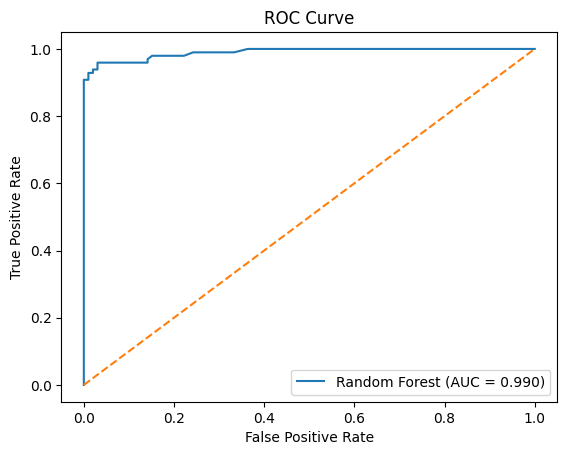

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probability predictions
rf_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC
fpr, tpr, thresholds = roc_curve(Y_test, rf_probs)
auc_score = roc_auc_score(Y_test, rf_probs)

plt.figure()
plt.plot(fpr, tpr, label="Random Forest (AUC = %0.3f)" % auc_score)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
import pickle

pickle.dump(rf_model, open("credit_card_fraud_model.pkl", "wb"))